In [36]:
!pip install pyttsx3

In [40]:
!sudo apt install libespeak1

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  espeak-data libportaudio2 libsonic0
The following NEW packages will be installed:
  espeak-data libespeak1 libportaudio2 libsonic0
0 upgraded, 4 newly installed, 0 to remove and 14 not upgraded.
Need to get 1,157 kB of archives.
After this operation, 2,822 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 espeak-data amd64 1.48.04+dfsg-5 [934 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libportaudio2 amd64 19.6.0-1 [64.6 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/main amd64 libsonic0 amd64 0.2.0-6 [13.4 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libespeak1 amd64 1.48.04+dfsg-5 [145 kB]
Fetched 1,157 kB in 2s (483 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd '/content/drive/MyDrive/Python and Deep Learning/multiobject_models'

/content/drive/MyDrive/Python and Deep Learning/multiobject_models


In [3]:
def compass_direction(w, h, st_x, st_y, ed_x, ed_y):
  origin_x = w/2
  origin_y = h/2

  box_x = (st_x+ed_x)/2
  box_y = (st_y+ed_y)/2

  delta_x = box_x-origin_x
  delta_y = box_y-origin_y

  degrees_temp = math.atan2(delta_x, delta_y)/math.pi*180

  if degrees_temp<0:
    degrees_final = 360+degrees_temp
  else:
    degrees_final = degrees_temp

  # compass_brackets = ["S", "SE", "E", "NE", "N", "NW", "W", "SW", "S"]
  compass_brackets = ["Bottom", "Bottom Right", "Right", "Top Right", "Top", "Top Left", "Left", "Bottom Left", "Bottom"]
  compass_lookup = round(degrees_final / 45)
  return compass_brackets[compass_lookup]

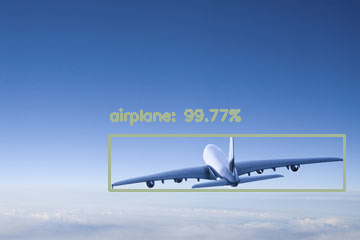

-1

In [7]:
import cv2
import numpy as np
import math
from google.colab.patches import cv2_imshow
from PIL import Image

 
# Load a model imported from Tensorflow
tensorflowNet = cv2.dnn.readNetFromTensorflow('inception.pb', 'inception.pbtxt')
 
# Input image
img = cv2.imread('example_02.jpg')
im = Image.open('example_02.jpg')
width, height = im.size
rows, cols, channels = img.shape

confidence_constant = 0.3
 
# Use the given image as input, which needs to be blob(s).
tensorflowNet.setInput(cv2.dnn.blobFromImage(img, size=(300, 300), swapRB=True, crop=False))
 
# Runs a forward pass to compute the net output
# Network produces output blob with a shape 1x1xNx7 where N is a number of
# [batchId, classId, confidence, left, top, right, bottom]
networkOutput = tensorflowNet.forward()

classes_90 = ["background", "person", "bicycle", "car", "motorcycle",
            "airplane", "bus", "train", "truck", "boat", "traffic light", "fire hydrant",
            "unknown", "stop sign", "parking meter", "bench", "bird", "cat", "dog", "horse",
            "sheep", "cow", "elephant", "bear", "zebra", "giraffe", "unknown", "backpack",
            "umbrella", "unknown", "unknown", "handbag", "tie", "suitcase", "frisbee", "skis",
            "snowboard", "sports ball", "kite", "baseball bat", "baseball glove", "skateboard",
            "surfboard", "tennis racket", "bottle", "unknown", "wine glass", "cup", "fork", "knife",
            "spoon", "bowl", "banana", "apple", "sandwich", "orange", "broccoli", "carrot", "hot dog",
            "pizza", "donut", "cake", "chair", "couch", "potted plant", "bed", "unknown", "dining table",
            "unknown", "unknown", "toilet", "unknown", "tv", "laptop", "mouse", "remote", "keyboard",
            "cell phone", "microwave", "oven", "toaster", "sink", "refrigerator", "unknown",
            "book", "clock", "vase", "scissors", "teddy bear", "hair drier", "toothbrush" ] 


CLASSES = classes_90
COLORS = np.random.uniform(0, 255, size=(len(CLASSES), 3))
cvNet = cv2.dnn.readNetFromTensorflow('inception.pb', 'inception.pbtxt')
h = img.shape[0] 
w = img.shape[1] 
cvNet.setInput(cv2.dnn.blobFromImage(img, size=(300, 300), swapRB=True, crop=False))
detections = cvNet.forward()


# loop over the detections
object_directions = []

for i in np.arange(0, detections.shape[2]): #detections.shape[2] ==> 100
    # extract the confidence (i.e., probability) associated with
    # the prediction
    confidence = detections[0, 0, i, 2]
    #print(confidence)

    # filter out weak detections by ensuring the `confidence` is
    # greater than the minimum confidence
    if confidence > confidence_constant:
        # extract the index of the class label from the
        # `detections`, then compute the (x, y)-coordinates of
        # the bounding box for the object
        idx = int(detections[0, 0, i, 1])
        box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
        (startX, startY, endX, endY) = box.astype("int")

        # draw the prediction on the frame
        label = "{}: {:.2f}%".format(CLASSES[idx],
            confidence * 100)
        cv2.rectangle(img, (startX, startY), (endX, endY),
            COLORS[idx], 2)
        y = startY - 15 if startY - 15 > 15 else startY + 15
        cv2.putText(img, label, (startX, y),
            cv2.FONT_HERSHEY_SIMPLEX, 0.5, COLORS[idx], 2)
        object_directions.append((label, compass_direction(width, height, startX,startY,endX,endY)))

# cv2.circle(img, (int(width/2),int(height/2)), 20, (0,0,255), 2)
cv2_imshow(img)
cv2.waitKey()

In [52]:

final_directions = []
for each in object_directions:
  final_directions.append((each[0].split(':')[0],each[1]))
print(final_directions)

for each in final_directions:
  print('There is a %s at %s' %(each[0],each[1]))



[('airplane', 'Bottom Right')]
There is a airplane at Bottom Right


In [43]:
# import pyttsx3
# engine = pyttsx3.init()
# engine.say("hello sir")
# engine.runAndWait()
# for each in final_directions:
#   engine.say('There is a %s on %s' %(each[0],each[1]))
#   engine.runAndWait()
  